# Tutorial: Configure and connect to the database

### **Requirements:** 

* completed tutorials 1-3.

This notebook outlines the steps to configure database settings and connect to the MySQL database (hosted either on your local machine, or on a remote virtual machine).

-----------

## 1. Configure access info

Below is a code snippet containing the pieces that need to be configured in order to instantiate and connect to your database. 

Before running this code, you will need to change some parameters depending on the set-up you're using (all relevant lines are marked in the code):

### Option A:

If you are hosting the database via a virtual machine (VM), change the IP to that of your remote machine's. You can find your remote machine's IP by running the following command on that machine's terminal:

<pre style="background-color: #1E1E1E; color: white; padding: 10px; border-radius: 5px; border-left: 5px solid #007bff;">
hostname -I
</pre>

In case you receive multiple outputs, take the first entry. 

### Option B:

If you plan to use this set-up at some point for real data with multiple users, you will need to change this line to accomodate the user in question. 

### Option C:

Likewise, if you plan to use this set-up for real data, you will need to change the root password and alter it here. Note: since this requires storing a password in plain text, the safest option is to not include this in the configuration settings for a deployed database. In this case, only include the user name, and each time `dj.conn()` is run, you will be prompted for your password. Annoying, but safe. :)  

In [ ]:
import os
import datajoint as dj

dj.config['enable_python_native_blobs'] = True
dj.config['database.host'] = '127.0.0.1:3306'            # Option A
dj.config['database.user'] = 'root'                      # Option B
dj.config['database.password'] = 'simple'                # Option C

if not 'stores' in dj.config:
    dj.config['stores'] = {}

epi_schema = dj.schema('epiphyte_mock')

dj.conn()

## 2. Configuring storage

If you're working locally, run the following cell to configure storage:

In [ ]:
dj.config['stores'] = {
    'local': {  # store in files
        'protocol': 'file',
        'location': os.path.abspath('./dj-store')
    }}

If you're working with a remote server using MinIO, run the cell below to configure storage. Replace the IP address (Option D) with the same one as above (Option A, i.e., the IP for your remote server running the VM). You'll also need to change the bucket name (Option E) to the one you're using:

In [ ]:
dj.config["stores"]["minio"] = {  
        "protocol": "s3",
        "endpoint": "127.0.0.1:9000",  # Option D
        "bucket": "<bucket>",          # Option E
        "location": "data",
        "access_key": "root", 
        "secret_key": "simple" 
    }

Successful connection will output something like:

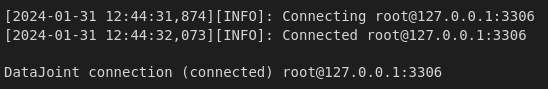

This code is already saved in the file `/src/epiphyte/database/access_info.py`, and can be modified to change the connection parameters. 

Once configured, you can connect by importing the `access_info.py` directly, instead of running the snippet above: 

In [ ]:
# set relative import
from .database import access_info 

## 3. Check the database connection

This following snippet creates an `ERD` diagram, also known as an Entity Relationship Diagram. 

Before any tables are created, this diagram will be empty, since there are no relationships to visualize. 

In [ ]:
erd = dj.ERD(epi_schema)
erd

After creating tables, establishing relationships, and defining inheritances between them, you can visualize these entities and their connections using the function `dj.ERD(<schema_name>)`.